<a href="https://colab.research.google.com/github/GhaithChaabane/Mini-Chatgpt/blob/main/gpt_dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Building a GPT
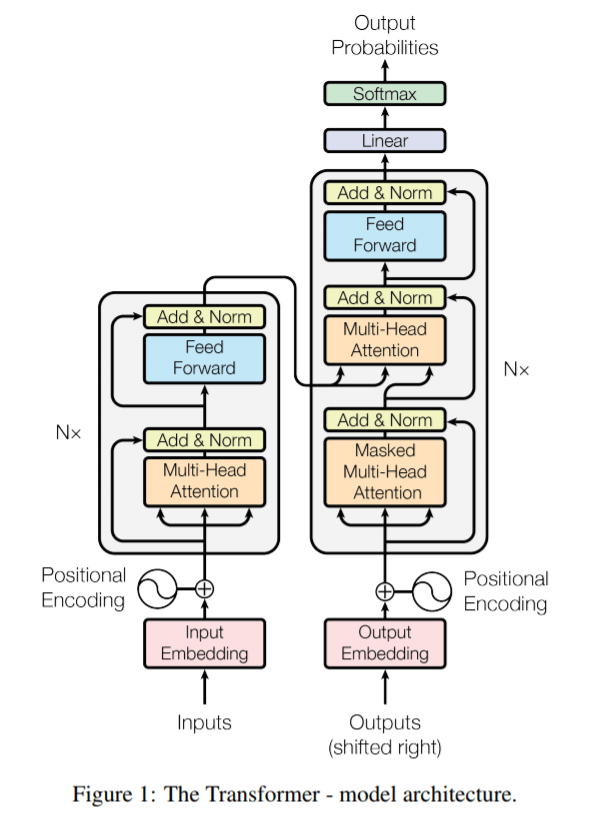

In [2]:
# read it in to inspect it
with open('Document.txt', 'r', encoding='utf-8') as f:
    text = f.read()

In [3]:
print("length of dataset in characters: ", len(text))

length of dataset in characters:  1054198


In [4]:
# let's look at the first 1000 characters
print(text[:1000])

عيناك.. آخر مركبين يسافران
فهل هنالك من مكان؟
إني تعبت من التسكع في محطات الجنون
وما وصلت إلى مكان..
عيناك آخر فرصتين متاحتين
لمن يفكر بالهروب..
وأنا.. أفكر بالهروب..
عيناك آخر ما تبقى من عصافير الجنوب
عيناك آخر ما تبقى من حشيش البحر،
آخر ما تبقى من حقول التبغ،
آخر ما تبقى من دموع الأقحوان
عيناك.. آخر زفةٍ شعبيةٍ تجري
وآخر مهرجان..
آخر ما تبقى من مكاتيب الغرام
ويداك.. آخر دفترين من الحرير..
عليهما..
سجلت أحلى ما لدي من الكلام
العشق يكويني، كلوح التوتياء،
ولا أذوب..
والشعر يطعنني بخنجره..
وأرفض أن أتوب..
إني أحبك..
ظلي معي..
ويبقى وجه فاطمةٍ
يحلق كالحمامة تحت أضواء الغروب
ظلي معي.. فلربما يأتي الحسين
وفي عباءته الحمائم، والمباخر، والطيوب
ووراءه تمشي المآذن، والربى
وجميع ثوار الجنوب..
3
عيناك آخر ساحلين من البنفسج
فكرت أن الشعر ينقذني..
ولكن القصائد أغرقتني..
ولكن النساء تقاسمتني..
أحبيبتي:
أعجوبةٌ أن ألتقي امرأةً بهذا الليل،
ترضى أن ترافقني..
أعجوبةٌ أن يكتب الشعراء في هذا الزمان.
أعجوبةٌ أن القصيدة لا تزال
تمر من بين الحرائق والدخان
تنط من فوق الحواجز، والمخافر، والهزائم،
كالحصان
أعجوب

In [6]:
# here are all the unique characters that occur in this text
chars = sorted(list(set(text)))
vocab_size = len(chars)
print('/'.join(chars))
print(vocab_size)


/ /!/"/(/)/*/,/./0/1/2/3/4/5/6/7/8/9/:/،/؟/ء/آ/أ/ؤ/إ/ئ/ا/ب/ة/ت/ث/ج/ح/خ/د/ذ/ر/ز/س/ش/ص/ض/ط/ظ/ع/غ/ـ/ف/ق/ك/ل/م/ن/ه/و/ى/ي/ً/ٌ/ٍ/َ/ُ/ِ/ّ/ْ/٠/ی/‌/–/…
72


In [8]:
# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

print(encode("غيث"))
print(decode(encode("غيث")))

[47, 58, 32]
غيث


In [9]:
# let's now encode the entire text dataset and store it into a torch.Tensor
import torch # we use PyTorch: https://pytorch.org
data = torch.tensor(encode(text), dtype=torch.long)
print(data.shape, data.dtype)
print(data[:1000]) # the 1000 characters we looked at earier will to the GPT look like this

torch.Size([1054198]) torch.int64
tensor([46, 58, 54, 28, 51,  8,  8,  1, 23, 35, 38,  1, 53, 38, 51, 29, 58, 54,
         1, 58, 40, 28, 49, 38, 28, 54,  0, 49, 55, 52,  1, 55, 54, 28, 52, 51,
         1, 53, 54,  1, 53, 51, 28, 54, 21,  0, 26, 54, 58,  1, 31, 46, 29, 31,
         1, 53, 54,  1, 28, 52, 31, 40, 51, 46,  1, 49, 58,  1, 53, 34, 44, 28,
        31,  1, 28, 52, 33, 54, 56, 54,  0, 56, 53, 28,  1, 56, 42, 52, 31,  1,
        26, 52, 57,  1, 53, 51, 28, 54,  8,  8,  0, 46, 58, 54, 28, 51,  1, 23,
        35, 38,  1, 49, 38, 42, 31, 58, 54,  1, 53, 31, 28, 34, 31, 58, 54,  0,
        52, 53, 54,  1, 58, 49, 51, 38,  1, 29, 28, 52, 55, 38, 56, 29,  8,  8,
         0, 56, 24, 54, 28,  8,  8,  1, 24, 49, 51, 38,  1, 29, 28, 52, 55, 38,
        56, 29,  8,  8,  0, 46, 58, 54, 28, 51,  1, 23, 35, 38,  1, 53, 28,  1,
        31, 29, 50, 57,  1, 53, 54,  1, 46, 42, 28, 49, 58, 38,  1, 28, 52, 33,
        54, 56, 29,  0, 46, 58, 54, 28, 51,  1, 23, 35, 38,  1, 53, 28,  1, 31,
      

In [10]:
# Let's now split up the data into train and validation sets
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

In [11]:
block_size = 8
train_data[:block_size+1]

tensor([46, 58, 54, 28, 51,  8,  8,  1, 23])

In [12]:
x = train_data[:block_size]
y = train_data[1:block_size+1]
for t in range(block_size):
    context = x[:t+1]
    target = y[t]
    print(f"when input is {context} the target: {target}")

when input is tensor([46]) the target: 58
when input is tensor([46, 58]) the target: 54
when input is tensor([46, 58, 54]) the target: 28
when input is tensor([46, 58, 54, 28]) the target: 51
when input is tensor([46, 58, 54, 28, 51]) the target: 8
when input is tensor([46, 58, 54, 28, 51,  8]) the target: 8
when input is tensor([46, 58, 54, 28, 51,  8,  8]) the target: 1
when input is tensor([46, 58, 54, 28, 51,  8,  8,  1]) the target: 23


In [13]:
torch.manual_seed(1337)
batch_size = 4 # how many independent sequences will we process in parallel?
block_size = 8 # what is the maximum context length for predictions?

def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    return x, y

xb, yb = get_batch('train')
print('inputs:')
print(xb.shape)
print(xb)
print('targets:')
print(yb.shape)
print(yb)

print('----')

for b in range(batch_size): # batch dimension
    for t in range(block_size): # time dimension
        context = xb[b, :t+1]
        target = yb[b,t]
        print(f"when input is {context.tolist()} the target: {target}")

inputs:
torch.Size([4, 8])
tensor([[47, 63, 58, 56, 53, 64,  0, 56],
        [22, 64,  0, 52, 58, 40,  1, 41],
        [ 1, 33, 28, 55, 52, 28, 59,  1],
        [63,  1, 53, 64, 32, 28, 52, 28]])
targets:
torch.Size([4, 8])
tensor([[63, 58, 56, 53, 64,  0, 56, 50],
        [64,  0, 52, 58, 40,  1, 41, 58],
        [33, 28, 55, 52, 28, 59,  1, 50],
        [ 1, 53, 64, 32, 28, 52, 28,  0]])
----
when input is [47] the target: 63
when input is [47, 63] the target: 58
when input is [47, 63, 58] the target: 56
when input is [47, 63, 58, 56] the target: 53
when input is [47, 63, 58, 56, 53] the target: 64
when input is [47, 63, 58, 56, 53, 64] the target: 0
when input is [47, 63, 58, 56, 53, 64, 0] the target: 56
when input is [47, 63, 58, 56, 53, 64, 0, 56] the target: 50
when input is [22] the target: 64
when input is [22, 64] the target: 0
when input is [22, 64, 0] the target: 52
when input is [22, 64, 0, 52] the target: 58
when input is [22, 64, 0, 52, 58] the target: 40
when input is [

In [14]:
print(xb) # our input to the transformer

tensor([[47, 63, 58, 56, 53, 64,  0, 56],
        [22, 64,  0, 52, 58, 40,  1, 41],
        [ 1, 33, 28, 55, 52, 28, 59,  1],
        [63,  1, 53, 64, 32, 28, 52, 28]])


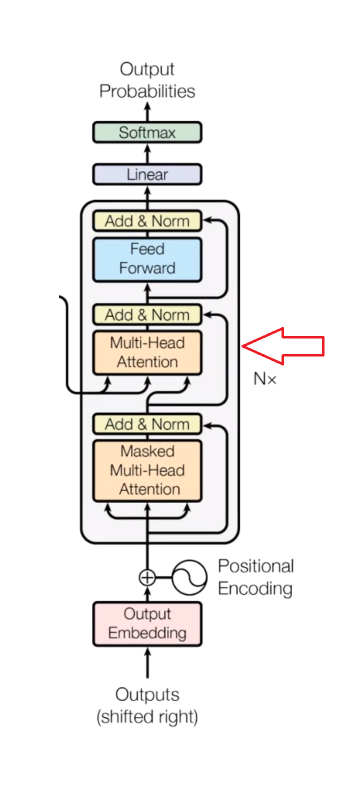

In [15]:
import torch
import torch.nn as nn
from torch.nn import functional as F
torch.manual_seed(1337)

class BigramLanguageModel(nn.Module):

    def __init__(self, vocab_size):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)

    def forward(self, idx, targets=None):

        # idx and targets are both (B,T) tensor of integers
        logits = self.token_embedding_table(idx) # (B,T,C)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # get the predictions
            logits, loss = self(idx)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx

m = BigramLanguageModel(vocab_size)
logits, loss = m(xb, yb)
print(logits.shape)
print(loss)

print(decode(m.generate(idx = torch.zeros((1, 1), dtype=torch.long), max_new_tokens=100)[0].tolist()))


torch.Size([32, 72])
tensor(4.8066, grad_fn=<NllLossBackward0>)

6–ف٠طؤدل9ثثسئ‌1كغًٌ‌خكد8دسٌش–ص…ًـ(6.,غجن7يط…ث،وفطغغْ،ي.ثمـىْق‌؟ش1ؤ6ث3ِؤ‌ءل!د.ئ71:عـ؟د.َ؟صشّخضْ08ٌ،ض6


In [16]:
# create a PyTorch optimizer
optimizer = torch.optim.AdamW(m.parameters(), lr=1e-3)

In [17]:
batch_size = 32
for steps in range(100): # increase number of steps for good results...

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = m(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

print(loss.item())


4.772195339202881


In [18]:
print(decode(m.generate(idx = torch.zeros((1, 1), dtype=torch.long), max_new_tokens=500)[0].tolist()))


و٠716أائ‌!,3),––يحل8ٍ3"ضكس43خ(ثونٌنًسض؟قض(ح 5٠م2…ُآ98…
ق؟لعیذبی6ـ!غسي‌1أإؤ03–8ِةًـةغي8صؤادِّ366ه5سب08غظ‌ْ49…خكةةوصُهف(خإ9ؤء؟كس*.3!ذ6ٍ .ِىُى1ِ
ةـ .ْى…يُيئ98)(مخءنمـ:–َ‌كد2ؤ"أً6دٍ6ى يصي؟.,هشأ‌9ٌّْزل1‌,ذس:2ك6حي3ّث8ضءذ6صآ,ع08ه7ف35،
9رط‌شثس2سٍـ‌13…ی9ردصح"ف")8ًثزجِعش2شعي3ضَِءت08
–ًفنْطلرن,3كغقققذ1ء…ًُـغفنغؤَِ
7ضتوی8ًك3ثثط26ب5ل8َ3آآ:ر
ةم–٠یذقإزْط0ظ–ه1ـ8ٍی٠‌آ9ی6ذِ)7؟ذ8ذب،08ة:"(‌5لو0لخإزجظءم,ثـ1 قمَی1"؟(آ.سض2رححوأ٠ح،ر7؟ذ،ط5بحِ70آ9تع؟لزغ3ءم,ًولذّ5ل!زغ,8صتهيیـ،صٍ7مطظ‌ئ‌(خ8ًُه7؟‌5مطض
حظنی:1آصزِ٠‌‌ءإؤ7إ9:
َ)


## The mathematical trick in self-attention
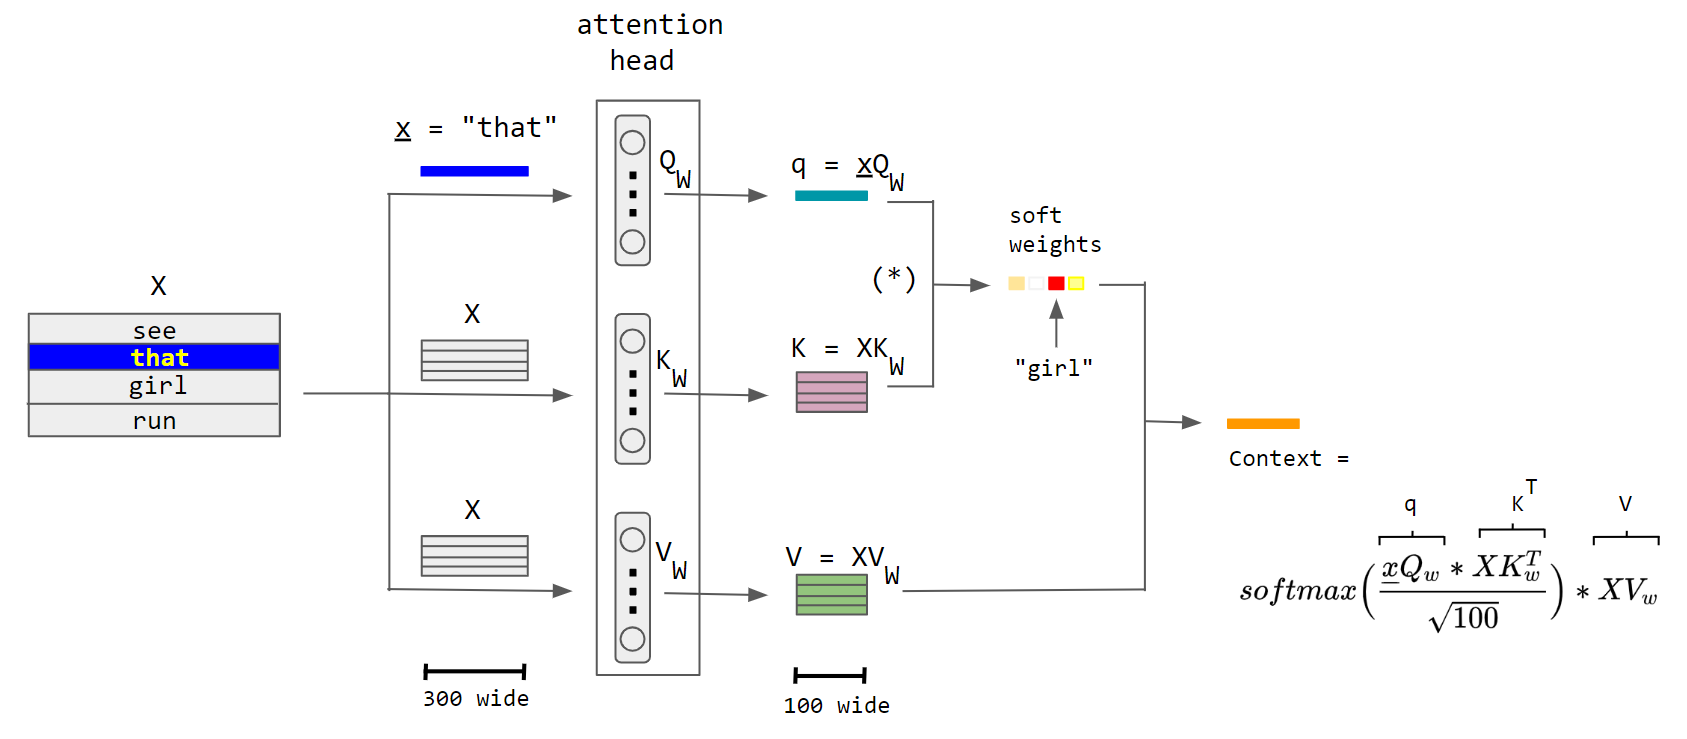

In [22]:
# We want x[b,t] = mean_{i<=t} x[b,i]
xbow = torch.zeros((B,T,C))
for b in range(B):
    for t in range(T):
        xprev = x[b,:t+1] # (t,C)
        xbow[b,t] = torch.mean(xprev, 0)


In [23]:
# version 4: self-attention!
torch.manual_seed(1337)
B,T,C = 4,8,32 # batch, time, channels
x = torch.randn(B,T,C)

# let's see a single Head perform self-attention
head_size = 16
key = nn.Linear(C, head_size, bias=False)
query = nn.Linear(C, head_size, bias=False)
value = nn.Linear(C, head_size, bias=False)
k = key(x)   # (B, T, 16)
q = query(x) # (B, T, 16)
wei =  q @ k.transpose(-2, -1) # (B, T, 16) @ (B, 16, T) ---> (B, T, T)

tril = torch.tril(torch.ones(T, T))
#wei = torch.zeros((T,T))
wei = wei.masked_fill(tril == 0, float('-inf'))
wei = F.softmax(wei, dim=-1)

v = value(x)
out = wei @ v
#out = wei @ x

out.shape

torch.Size([4, 8, 16])

In [24]:
wei[0]

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1574, 0.8426, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2088, 0.1646, 0.6266, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5792, 0.1187, 0.1889, 0.1131, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0294, 0.1052, 0.0469, 0.0276, 0.7909, 0.0000, 0.0000, 0.0000],
        [0.0176, 0.2689, 0.0215, 0.0089, 0.6812, 0.0019, 0.0000, 0.0000],
        [0.1691, 0.4066, 0.0438, 0.0416, 0.1048, 0.2012, 0.0329, 0.0000],
        [0.0210, 0.0843, 0.0555, 0.2297, 0.0573, 0.0709, 0.2423, 0.2391]],
       grad_fn=<SelectBackward0>)

- Attention is a **communication mechanism**. Can be seen as nodes in a directed graph looking at each other and aggregating information with a weighted sum from all nodes that point to them, with data-dependent weights.
- There is no notion of space. Attention simply acts over a set of vectors. This is why we need to positionally encode tokens.
- Each example across batch dimension is of course processed completely independently and never "talk" to each other
- In an "encoder" attention block just delete the single line that does masking with `tril`, allowing all tokens to communicate. This block here is called a "decoder" attention block because it has triangular masking, and is usually used in autoregressive settings, like language modeling.
- "self-attention" just means that the keys and values are produced from the same source as queries. In "cross-attention", the queries still get produced from x, but the keys and values come from some other, external source (e.g. an encoder module)
- "Scaled" attention additional divides `wei` by 1/sqrt(head_size). This makes it so when input Q,K are unit variance, wei will be unit variance too and Softmax will stay diffuse and not saturate too much. Illustration below

In [25]:
k = torch.randn(B,T,head_size)
q = torch.randn(B,T,head_size)
wei = q @ k.transpose(-2, -1) * head_size**-0.5

In [27]:
class LayerNorm1d: # (used to be BatchNorm1d)

  def __init__(self, dim, eps=1e-5, momentum=0.1):
    self.eps = eps
    self.gamma = torch.ones(dim)
    self.beta = torch.zeros(dim)

  def __call__(self, x):
    # calculate the forward pass
    xmean = x.mean(1, keepdim=True) # batch mean
    xvar = x.var(1, keepdim=True) # batch variance
    xhat = (x - xmean) / torch.sqrt(xvar + self.eps) # normalize to unit variance
    self.out = self.gamma * xhat + self.beta
    return self.out

  def parameters(self):
    return [self.gamma, self.beta]

torch.manual_seed(1337)
module = LayerNorm1d(100)
x = torch.randn(32, 100) # batch size 32 of 100-dimensional vectors
x = module(x)
x.shape

torch.Size([32, 100])

In [28]:
x[:,0].mean(), x[:,0].std() # mean,std of one feature across all batch inputs

(tensor(0.1469), tensor(0.8803))

In [29]:
x[0,:].mean(), x[0,:].std() # mean,std of a single input from the batch, of its features

(tensor(-9.5367e-09), tensor(1.0000))

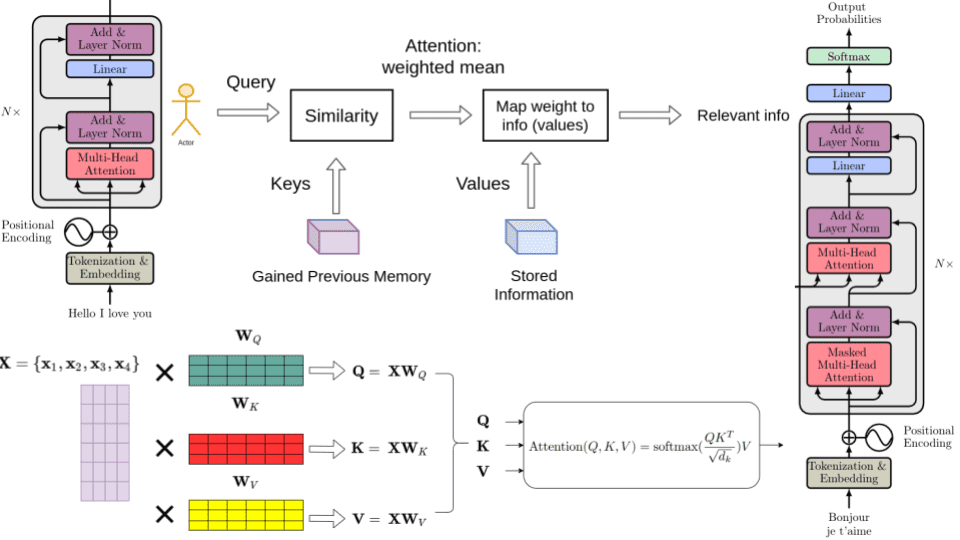

### Full finished code, for reference

You may want to refer directly to the git repo instead though.

In [30]:
import torch
import torch.nn as nn
from torch.nn import functional as F

# hyperparameters
batch_size = 16 # how many independent sequences will we process in parallel?
block_size = 32 # what is the maximum context length for predictions?
max_iters = 5000
eval_interval = 100
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200
n_embd = 64
n_head = 4
n_layer = 4
dropout = 0.0
# ------------

torch.manual_seed(1337)

with open('Document.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# here are all the unique characters that occur in this text
chars = sorted(list(set(text)))
vocab_size = len(chars)
# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

# Train and test splits
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

# data loading
def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    x, y = x.to(device), y.to(device)
    return x, y

@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

class Head(nn.Module):
    """ one head of self-attention """

    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(n_embd, head_size, bias=False)
        self.query = nn.Linear(n_embd, head_size, bias=False)
        self.value = nn.Linear(n_embd, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))

        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        B,T,C = x.shape
        k = self.key(x)   # (B,T,C)
        q = self.query(x) # (B,T,C)
        # compute attention scores ("affinities")
        wei = q @ k.transpose(-2,-1) * C**-0.5 # (B, T, C) @ (B, C, T) -> (B, T, T)
        wei = wei.masked_fill(self.tril[:T, :T] == 0, float('-inf')) # (B, T, T)
        wei = F.softmax(wei, dim=-1) # (B, T, T)
        wei = self.dropout(wei)
        # perform the weighted aggregation of the values
        v = self.value(x) # (B,T,C)
        out = wei @ v # (B, T, T) @ (B, T, C) -> (B, T, C)
        return out

class MultiHeadAttention(nn.Module):
    """ multiple heads of self-attention in parallel """

    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])
        self.proj = nn.Linear(n_embd, n_embd)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        out = self.dropout(self.proj(out))
        return out

class FeedFoward(nn.Module):
    """ a simple linear layer followed by a non-linearity """

    def __init__(self, n_embd):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),
            nn.ReLU(),
            nn.Linear(4 * n_embd, n_embd),
            nn.Dropout(dropout),
        )

    def forward(self, x):
        return self.net(x)

class Block(nn.Module):
    """ Transformer block: communication followed by computation """

    def __init__(self, n_embd, n_head):
        # n_embd: embedding dimension, n_head: the number of heads we'd like
        super().__init__()
        head_size = n_embd // n_head
        self.sa = MultiHeadAttention(n_head, head_size)
        self.ffwd = FeedFoward(n_embd)
        self.ln1 = nn.LayerNorm(n_embd)
        self.ln2 = nn.LayerNorm(n_embd)

    def forward(self, x):
        x = x + self.sa(self.ln1(x))
        x = x + self.ffwd(self.ln2(x))
        return x

# super simple bigram model
class BigramLanguageModel(nn.Module):

    def __init__(self):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, n_embd)
        self.position_embedding_table = nn.Embedding(block_size, n_embd)
        self.blocks = nn.Sequential(*[Block(n_embd, n_head=n_head) for _ in range(n_layer)])
        self.ln_f = nn.LayerNorm(n_embd) # final layer norm
        self.lm_head = nn.Linear(n_embd, vocab_size)

    def forward(self, idx, targets=None):
        B, T = idx.shape

        # idx and targets are both (B,T) tensor of integers
        tok_emb = self.token_embedding_table(idx) # (B,T,C)
        pos_emb = self.position_embedding_table(torch.arange(T, device=device)) # (T,C)
        x = tok_emb + pos_emb # (B,T,C)
        x = self.blocks(x) # (B,T,C)
        x = self.ln_f(x) # (B,T,C)
        logits = self.lm_head(x) # (B,T,vocab_size)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # crop idx to the last block_size tokens
            idx_cond = idx[:, -block_size:]
            # get the predictions
            logits, loss = self(idx_cond)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx

model = BigramLanguageModel()
m = model.to(device)
# print the number of parameters in the model
print(sum(p.numel() for p in m.parameters())/1e6, 'M parameters')

# create a PyTorch optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

for iter in range(max_iters):

    # every once in a while evaluate the loss on train and val sets
    if iter % eval_interval == 0 or iter == max_iters - 1:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

# generate from the model
context = torch.zeros((1, 1), dtype=torch.long, device=device)
print(decode(m.generate(context, max_new_tokens=2000)[0].tolist()))


0.210632 M parameters
step 0: train loss 4.4409, val loss 4.4409
step 100: train loss 2.9124, val loss 2.8257
step 200: train loss 2.7806, val loss 2.6988
step 300: train loss 2.7117, val loss 2.6437
step 400: train loss 2.6594, val loss 2.5857
step 500: train loss 2.6178, val loss 2.5095
step 600: train loss 2.5687, val loss 2.4978
step 700: train loss 2.5491, val loss 2.4734
step 800: train loss 2.5071, val loss 2.4305
step 900: train loss 2.4981, val loss 2.3927
step 1000: train loss 2.4719, val loss 2.3969
step 1100: train loss 2.4536, val loss 2.3666
step 1200: train loss 2.4360, val loss 2.3244
step 1300: train loss 2.4445, val loss 2.3511
step 1400: train loss 2.4149, val loss 2.3069
step 1500: train loss 2.4020, val loss 2.3085
step 1600: train loss 2.3871, val loss 2.2519
step 1700: train loss 2.3772, val loss 2.2651
step 1800: train loss 2.3784, val loss 2.2592
step 1900: train loss 2.3463, val loss 2.2427
step 2000: train loss 2.3376, val loss 2.2354
step 2100: train loss 2.